Yasaman Shahrasbi

COMP 5107 - Assignment4

Student#: 101201935

Consider the two-class pattern recognition problem in which the class conditional distributions are both
normally distributed with arbitrary means M1 and M2, and covariance matrices sigma1 and sigma2 respectively.


Assume that you are working in a 3-D space (for example, as in Assignment II) and that the covariance
matrices are not equal.

Libraries

In [1]:
import numpy as np
from numpy import linalg as LA

# Inputs

In this part, the mean, covariance, and probability of each distribution are taken from the user.

In [2]:
covariance_0 = np.identity(3)
mean_0 = np.array([1, 0, 1])

## Mean

In [3]:
'''4
1
3
-4
1
-3'''

'4\n1\n3\n-4\n1\n-3'

In [5]:
# Class 1 Mean
mean1 = []
for i in range(3):
  mean1.append(float(input("mean of class1 values ")))
mean1 = np.array(mean1)

# Class 2 Mean
mean2 = []
for i in range(3):
  mean2.append(float(input("mean of class2 values ")))
mean2 = np.array(mean2)

print("mean1", mean1)
print("mean2", mean2)

mean of class1 values 4
mean of class1 values 1
mean of class1 values 3
mean of class2 values -4
mean of class2 values 1
mean of class2 values -3
mean1 [4. 1. 3.]
mean2 [-4.  1. -3.]


## Covariance

In [9]:
'''
4
3
2
0.1
0.2
'''

'\n4\n3\n2\n0.1\n0.2\n'

In [6]:
# Covariance Par0ameters
a, b, c, alpha, beta = float(input("a ")), float(input("b ")), float(input("c ")), float(input("alpha ")), float(input("beta "))

a 4
b 3
c 2
alpha 0.1
beta 0.2


In [8]:
# Covariance matrix 1
sigma1 = np.array([[a**2, alpha * a * b, beta * a * c],
                       [alpha * a * b, b**2, alpha * b * c],
                       [beta * a * c, alpha * b * c, c**2]])

In [9]:
# Covariance matrix 2
sigma2 = np.array([[c**2, beta * b * c, alpha * a * c],
                       [beta * b * c, b**2, alpha * a * b],
                       [alpha * a * c, alpha * a * b, a**2]])

## Probabilities

In [10]:
p1, p2 = float(input("p1 ")), float(input("p2 "))

p1 0.5
p2 0.5


#Part a 


Generate 200 training points of each distribution before diagonalization and plot them in the (x1–x2) and (x2–x3) domains.

In [11]:
# This function generates Gaussian random matrices. 
# It gets the dimension of points, number of points to generate, mean and covariance matrix as input.

def generate_gaussian_matrix(dimension, number_of_points, mean, sigma):
  # The first part of the code generates a gaussian random matrix of points with mean = 0 and covariance matrix = I (identity matrix) 
  random_matrix = np.zeros((dimension, number_of_points))
  for d in range(dimension):
    number = 0
    for i in range(0, 12):
      number = number + np.random.uniform(0, 1, number_of_points)
    number = number - 6
    random_matrix[d,:] = number

  # Now that a random gaussian matrix is generated with mean = 0 and covariance matrix = I (identity matrix), 
  # the goal is to convert the matrix to a normal distribution where mean is equal to mean of X and the convariance matrix is equal to sigma of X

  w, v = LA.eig(sigma) #eigen value and eigen vector of 
  matrix_X = np.dot(np.dot(v, np.power(np.diag(w), 1/2)), random_matrix)
  for col in range(number_of_points):
    matrix_X[:, col] = matrix_X[:, col] + mean
  return matrix_X

In [12]:
# Generating 200 points of each distribution

matrix_X1 = generate_gaussian_matrix(3, 200, mean1, sigma1)
matrix_X2 = generate_gaussian_matrix(3, 200, mean2, sigma2)

In [13]:
matrix_X1.shape

(3, 200)

In [14]:
# Function to plot the points

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

def plot(matrix_of_points1, matrix_of_points2, d1, d2, title):
  figure(figsize=(7, 7), dpi=80)
  plt.scatter(matrix_of_points1[d1-1, :], matrix_of_points1[d2-1, :], color = 'pink', label = "Class1")
  plt.scatter(matrix_of_points2[d1-1, :], matrix_of_points2[d2-1, :], color = 'green', label = "Class2")

  plt.title("x"+str(d1)+"-x"+str(d2)+" "+title) 
  plt.xlabel("x-"+str(d1))
  plt.ylabel("x-"+str(d2))
  plt.legend(fontsize=14)
  plt.show()

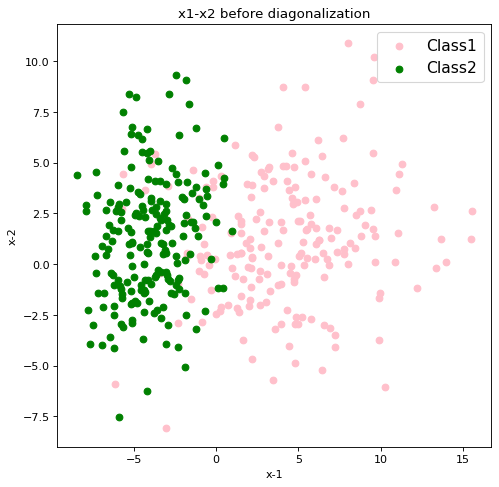

In [15]:
# plot the points in matrix X1 and matrix X2 along x1-x2 dimension
plot(matrix_X1, matrix_X2, 1, 2, "before diagonalization")

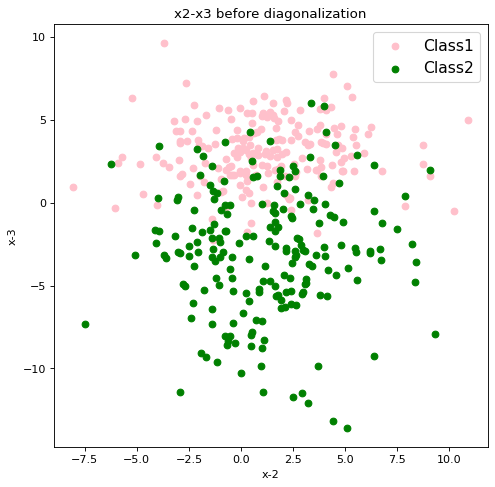

In [16]:
# plot the points in matrix X1 and matrix X2 along x1-x3 dimension
plot(matrix_X1, matrix_X2, 2, 3, "before diagonalization")

# Part b:

Using these training points estimate the parameters of each distribution using a maximum 
likelihood and a Bayesian methodology. 

In the latter, assume that you know the covariances. 

Plot 
the convergence of the parameters with the number of samples in each case.


## Auxiliary Functions

### Function to plot convergence#

In [17]:
# Function to plot the points

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

def convergence_plot(points, conv, title, class_numb):
  figure(figsize=(7, 7), dpi=80)
  plt.plot(points, conv, color = 'blue', marker=".", markersize=5, label = class_numb)
  #plt.scatter(points, conv, color = 'pink', label = "Class1", 'ko', markersize=2)

  plt.title(title)
  plt.legend(fontsize=14)
  plt.show()

### function to convert points

In [18]:
def convert(data):
  dim = data.shape[0]
  num_of_points = data.shape[1]
  data_converted = []
  for i in range(num_of_points):
    d = []
    for j in range(dim):
      d.append(data[j][i])
    data_converted.append(d)
  data_converted = np.array(data_converted)
  return data_converted

## b.1. Maximum Likelihood

### Mean

In [19]:
def maximum_likelihood_mean(data):
  num_of_points = data.shape[0]
  s = np.sum(data, axis = 0)
  mean = s/num_of_points
  return mean

In [20]:
maximum_likelihood_mean(convert(matrix_X1))

array([4.06561291, 1.1782481 , 3.05513257])

#### Convergence of Maximum-Likelihood mean estimation

In [19]:
def mean_convergence_ml(data, real_mean):
  num_of_points = data.shape[0]
  ml_estimated_means = []

  for i in range(1, num_of_points): 
    ml_estimated_means.append(maximum_likelihood_mean(data[:i]))

  #return np.arange(1, num_of_points), ml_estimated_means
  convergence = np.absolute(np.linalg.norm(ml_estimated_means - real_mean, axis = 1))
  return np.arange(1, num_of_points), convergence

##### Maximum Likelihood Mean Convergence - Class1

In [20]:
points, ml_mean_conv1 = mean_convergence_ml(convert(matrix_X1), mean1)

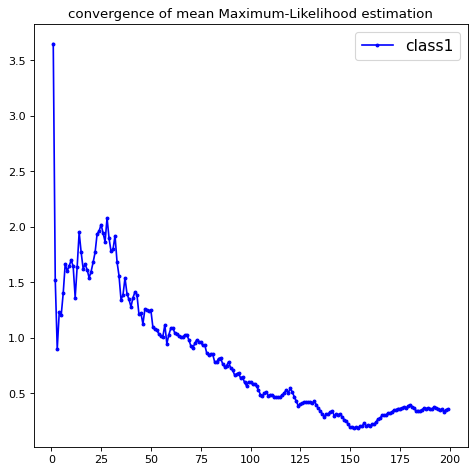

In [21]:
convergence_plot(points, ml_mean_conv1, "convergence of mean Maximum-Likelihood estimation", "class1")

##### Maximum Likelihood Mean Convergence - Class2

In [22]:
points, ml_mean_conv2 = mean_convergence_ml(convert(matrix_X2), mean2)

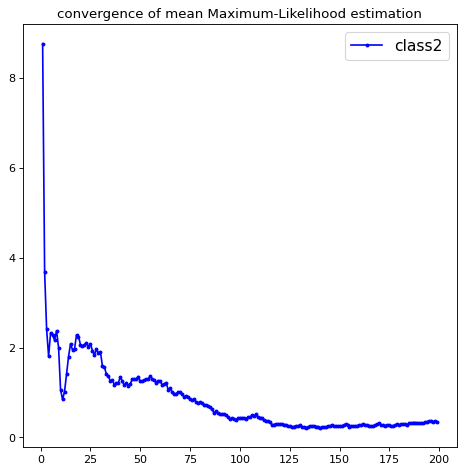

In [23]:
convergence_plot(points, ml_mean_conv2, "convergence of mean Maximum-Likelihood estimation", "class2")

### Covariance

In [33]:
def maximum_likelihood_covariance(data):
  num_of_points = data.shape[0]
  A1 = data - maximum_likelihood_mean(data)
  variance = np.dot(A1.T, A1)/num_of_points
  return variance

In [34]:
maximum_likelihood_covariance(convert(matrix_X1)).shape

(3, 3)

#### Convergence of Maximum-Likelihood covariance estimation

In [26]:
def covariance_convergence_ml(data, real_covariance):
  num_of_points = data.shape[0]
  ml_estimated_covariance = []

  for i in range(1, num_of_points):
    ml_estimated_covariance.append(maximum_likelihood_covariance(data[:i]))
  #return ml_estimated_covariance
  #return np.arange(1, num_of_points), ml_estimated_means
  A1 = np.array(ml_estimated_covariance) - real_covariance
  convergence = []
  for i in A1:
    convergence.append(np.absolute(np.linalg.norm(i)))
  return np.arange(1, num_of_points), convergence

##### Maximum Likelihood Covariance Convergence - Class1

In [27]:
points, ml_cov_conv1 = covariance_convergence_ml(convert(matrix_X1), sigma1)

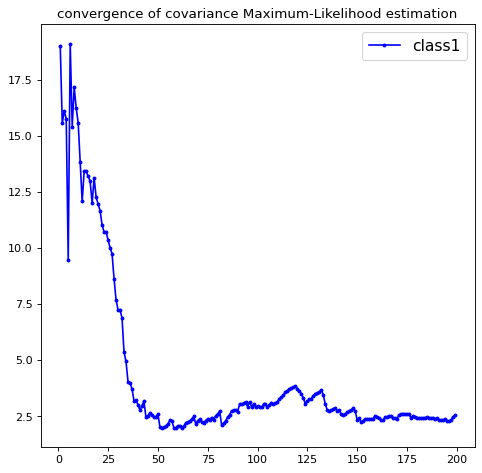

In [28]:
convergence_plot(points, ml_cov_conv1, "convergence of covariance Maximum-Likelihood estimation", "class1")

##### Maximum Likelihood Covariance Convergence - Class2

In [29]:
points, ml_cov_conv2 = covariance_convergence_ml(convert(matrix_X2), sigma2)

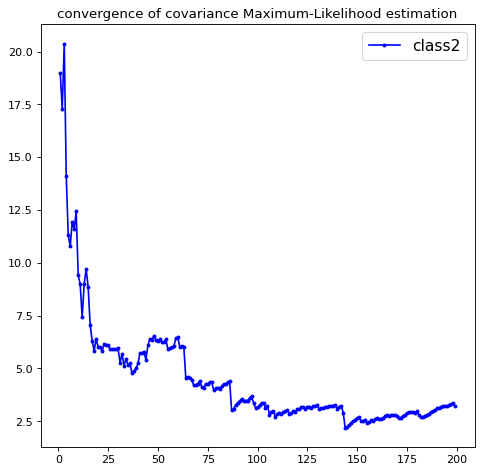

In [30]:
convergence_plot(points, ml_cov_conv2, "convergence of covariance Maximum-Likelihood estimation", "class2")

## b.2. Bayesian

### Mean

In [21]:
def Bayesian_mean_estimation(data, covariance, covariance_0, mean_0):
  n = data.shape[0]
  A1 = np.transpose(covariance/n + covariance_0)
  A2 = (1/n) * np.dot(np.dot(covariance, A1), mean_0)
  A3 = np.dot(np.dot(covariance_0, A1), np.sum(data, axis = 0)/n)
  mean = A2 + A3
  return mean

In [38]:
Bayesian_mean_estimation(convert(matrix_X1), maximum_likelihood_covariance(convert(matrix_X1)), covariance_0, mean_0)

array([4.52304282, 1.27879462, 3.15788347])

#### Convergence of Bayesian mean estimation

In [32]:
def mean_convergence_Bayesian(data, real_mean):
  num_of_points = data.shape[0]

  covariance_0 = np.identity(3)
  mean_0 = np.array([1, 0, 1])
  covariance = maximum_likelihood_covariance(data)

  Bayesian_estimated_means = []

  for i in range(1, num_of_points):
    Bayesian_estimated_means.append(Bayesian_mean_estimation(data[:i], covariance, covariance_0, mean_0))

  convergence = np.absolute(np.linalg.norm(Bayesian_estimated_means - real_mean, axis = 1))
  return np.arange(1, num_of_points), convergence

##### Bayesian Convergence - Class1

In [33]:
points1, bl_mean_conv1 = mean_convergence_Bayesian(convert(matrix_X1), mean1)

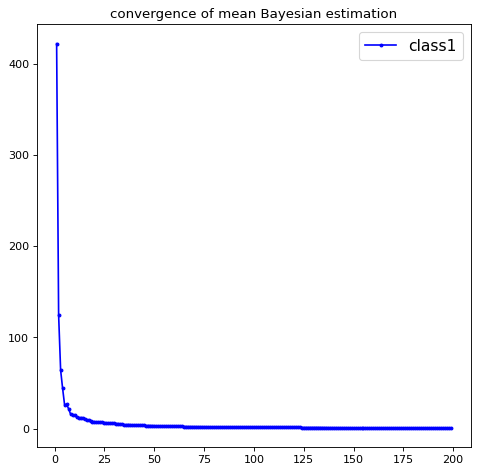

In [34]:
convergence_plot(points1, bl_mean_conv1, "convergence of mean Bayesian estimation", "class1")

##### Bayesian Convergence - Class2

In [35]:
points2, bl_mean_conv2 = mean_convergence_Bayesian(convert(matrix_X2), mean2)

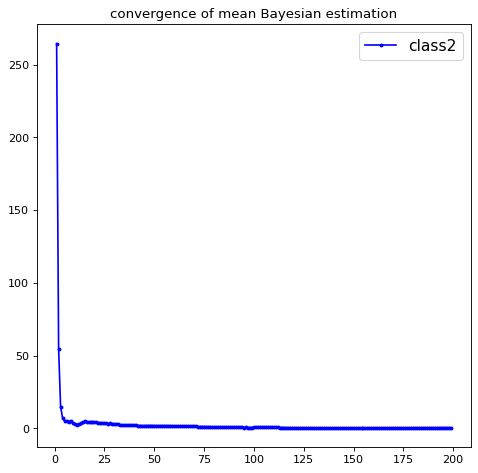

In [36]:
convergence_plot(points2, bl_mean_conv2, "convergence of mean Bayesian estimation", "class2")

# Part c

Using these same training points estimate each univariate distribution using a Parzen Window 
approach. 

In this case, work with the features in each dimension separately, and with an 
appropriate Gaussian kernel. 

For the output, you must plot the final learned distribution of the 
features in each dimension, and print out their “sample” mean and variance in each dimension

In [37]:
import math
def Gaussian_kernel(x, x_i):
  covariance = 0.5
  distribution = 1 / (math.sqrt(2 * math.pi) * covariance) * math.exp(-1 * np.power((x-x_i), 2) / (2 * np.power(covariance, 2)))
  return distribution

## Mean

In [38]:
def Parzen_mean_estimation(x, prob_x, volume):
  return x * prob_x * volume

## Covariance

In [39]:
def Parzen_covariance_estimation(x, prob_x, mean, volume):
  return np.power((x - mean), 2) * prob_x * volume

## Parzen estimation per dimension

In [45]:
def parzen_per_dimension(points, volume):
  dimension = points.shape[0]
  parzen_mean_estimation = []
  parzen_covariance_estimation = []
  for dim in range(dimension):
    new_points = []
    probabilities = []
    print("here", min(points[dim]), max(points[dim]))
    for pnt in np.arange(min(points[dim]), max(points[dim]), volume):
      new_points.append(pnt)
    
    # for each new point, calculate the contribution of the existing points:
    for x in new_points:
      prob = 0
      for x_i in points[dim]:
        prob += Gaussian_kernel(x, x_i)
      prob = prob / len(points[dim])
      probabilities.append(prob)
    
    parzen_mean = 0
    for i in range(len(new_points)):
      parzen_mean +=  Parzen_mean_estimation(new_points[i], probabilities[i], volume)
    parzen_mean_estimation.append(parzen_mean/len(new_points))

    parzen_covariance = 0
    for i in range(len(new_points)):
      parzen_covariance = parzen_covariance + Parzen_covariance_estimation(new_points[i], probabilities[i], parzen_mean, volume)
    parzen_covariance_estimation.append(parzen_covariance/len(new_points))

    # plot the final learned distribution of the features in each dimension
    plt.plot(new_points, probabilities, color = 'green', label="dimension"+str(dim))
    
  return np.array(parzen_mean_estimation), np.diag(np.array(parzen_covariance_estimation))

### Class1

In [44]:
matrix_X1.shape

(3, 200)

here -6.3940218187661255 12.802247784523237
here -10.12661368283085 7.9231679831144195
here -2.304839415709692 8.984646232586039


(array([0.10091437, 0.02933969, 0.14523969]),
 array([[0.36911265, 0.        , 0.        ],
        [0.        , 0.26624517, 0.        ],
        [0.        , 0.        , 0.17204966]]))

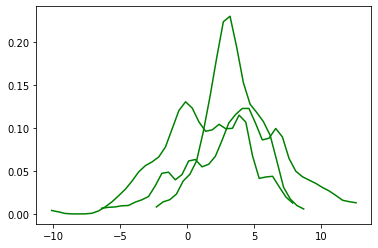

In [46]:
Parzen_mean_1, Parzen_covariance_1 = parzen_per_dimension(matrix_X1, 0.5)
Parzen_mean_1, Parzen_covariance_1

### Class2

(array([-0.1526437,  0.0354559, -0.0723055]),
 array([[0.17175492, 0.        , 0.        ],
        [0.        , 0.2704145 , 0.        ],
        [0.        , 0.        , 0.2826966 ]]))

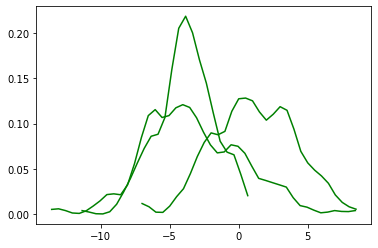

In [43]:
Parzen_mean_2, Parzen_covariance_2 = parzen_per_dimension(matrix_X2, 0.5)
Parzen_mean_2, Parzen_covariance_2

Parzen Estimation:

Class1:[0.09615002, 0.04619526, 0.05847697]

mean: [0.39117534, 0.52039011, 0.65012306]

covariance:

Class2:

mean: [-0.19277357, -0.05389052, -0.08775358]

covariance: [0.18506276, 0.48739113, 1.92412985]

# Part d

Using the estimated distributions, compute the optimal Bayes discriminant function (for the ML, 
Bayes and Parzen schemes) and plot it in the (x1–x2) and (x2–x3) domains.

In [ ]:
# Function to compute the optimal Bayes discriminant

def bayes_discriminant(sigma1, mean1, sigma2, mean2, p1 = 50, p2 = 50):
  C = (1/2 * np.log(np.linalg.det(sigma2)/np.linalg.det(sigma1))) + np.log(p1/p2) + 1/2 * (np.dot(np.dot(np.transpose(mean2), np.linalg.inv(sigma2)), mean2) -  np.dot(np.dot(np.transpose(mean1), np.linalg.inv(sigma1)), mean1))
  B = np.transpose(np.dot(np.transpose(mean1), np.linalg.inv(sigma1)) - np.dot(np.transpose(mean2), np.linalg.inv(sigma2)))
  A = 1/2 * (np.linalg.inv(sigma2) - np.linalg.inv(sigma1)) 
  return A, B, C

In [ ]:
# X1-X2 domain (X0 - X1 in my code since I'm start indexing from 0):
# consider X0 as a variable and X1 as a constant
# This function finds the discriminant curve between class one and class two
# , by finding the points located on that curve.

def discriminant_function_X0_X1(sigma1, mean1, sigma2, mean2, p1, p2):
  A, B, C = bayes_discriminant(sigma1, mean1, sigma2, mean2, p1, p2)
  x1_points = []
  roots1_x0 = []
  roots2_x0 = []
  for x1 in np.arange(-5, 5, 0.1): # -5, 5, 0.1
    x1_points.append(x1)
    m = A[0][0]
    n = np.dot((A[1][0] + A[0][1]), x1) + B[0]
    p = np.dot(A[1][1], np.power(x1, 2)) + np.dot(B[1], x1) + C
    root1_x0, root2_x0 = np.roots(np.array([m, n, p]))
    roots1_x0.append(root1_x0)
    roots2_x0.append(root2_x0)
  return x1_points, roots1_x0, roots2_x0

In [ ]:
# X2 - X3 domain (X1-X2 in my code since I'm start indexing form 0):
# consider X1 as a variable and x2 as a constant

def discriminant_function_X1_X2(sigma1, mean1, sigma2, mean2, p1, p2):
  A, B, C = bayes_discriminant(sigma1, mean1, sigma2, mean2, p1, p2)
  x2_points = []
  roots1_x1 = []
  roots2_x1 = []
  for x2 in np.arange(-5, 5, 0.1):
    x2_points.append(x2)
    m = A[1][1]
    n = np.dot((A[2][1] + A[1][2]), x2) + B[1]
    p = np.dot(A[2][2], np.power(x2, 2)) + np.dot(B[2], x2) + C
    root1_x1, root2_x1 = np.roots(np.array([m, n, p]))
    roots1_x1.append(root1_x1)
    roots2_x1.append(root2_x1)
  return x2_points, roots1_x1, roots2_x1

In [ ]:
def plot2(matrix_of_points1, matrix_of_points2, points, roots1, roots2, d1, d2, title):
  figure(figsize=(7, 7), dpi=80)
  plt.scatter(matrix_of_points1[d1-1, :], matrix_of_points1[d2-1, :], color = 'pink', label = "Class1")
  plt.scatter(matrix_of_points2[d1-1, :], matrix_of_points2[d2-1, :], color = 'green', label = "Class2")

  plt.scatter(roots1, points, color = 'blue', label = "discriminant function")
  plt.scatter(roots2, points, color = 'purple', label = "discriminant function")

  plt.title("x"+str(d1)+"-x"+str(d2)+" "+title) 
  plt.xlabel("x-"+str(d1))
  plt.ylabel("x-"+str(d2))
  plt.legend(fontsize=14)
  plt.show()

## 1. Maximum Likelihood

### Class1

In [ ]:
ML_mean_1 = maximum_likelihood_mean(convert(matrix_X1))
ML_covariance_1 = maximum_likelihood_covariance(convert(matrix_X1))

### Class2

In [ ]:
ML_mean_2 = maximum_likelihood_mean(convert(matrix_X2))
ML_covariance_2 = maximum_likelihood_covariance(convert(matrix_X2))

### Maximum Likelihood - Discriminant Function

#### Plot on X1-X2 domain

In [ ]:
x1_points_01_w1, roots1_x0_01_w1, roots2_x0_01_w1 = discriminant_function_X0_X1(ML_covariance_1, ML_mean_1, ML_covariance_2, ML_mean_2, p1, p2)

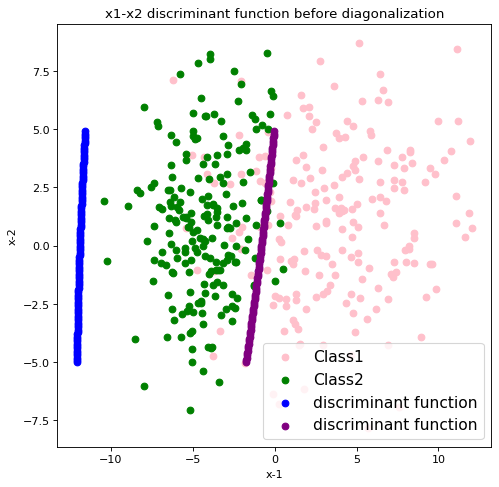

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x1_points_01_w1,
      roots1 = roots1_x0_01_w1,
      roots2 = roots2_x0_01_w1,
      d1 = 1, 
      d2 = 2, 
      title = "discriminant function before diagonalization")

#### Plot on X2-X3 domain

In [1]:
x2_points_12_w1, roots1_x1_01_w1, roots2_x1_01_w1 = discriminant_function_X1_X2(ML_covariance_1, ML_mean_1, ML_covariance_2, ML_mean_2, p1, p2)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


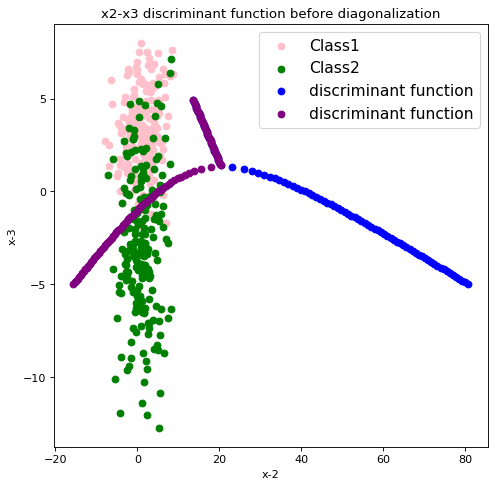

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x2_points_12_w1,
      roots1 = roots1_x1_01_w1,
      roots2 = roots2_x1_01_w1,
      d1 = 2, 
      d2 = 3, 
      title = "discriminant function before diagonalization")

## 2. Bayesian

In [ ]:
covariance_0 = np.identity(3)
mean_0 = np.array([1, 0, 1])

### Class1

In [ ]:
#data, covariance, covariance_0, mean_0

bl_mean_1 = Bayesian_mean_estimation(convert(matrix_X1), ML_covariance_1, covariance_0, mean_0)

### Class2

In [ ]:
bl_mean_2 = Bayesian_mean_estimation(convert(matrix_X2), ML_covariance_2, covariance_0, mean_0)

### Bayesian - Discriminant Function

#### Plot on X1-X2 domain

In [ ]:
x1_points_01_w1, roots1_x0_01_w1, roots2_x0_01_w1 = discriminant_function_X0_X1(ML_covariance_1, bl_mean_1, ML_covariance_2, bl_mean_2, p1, p2)

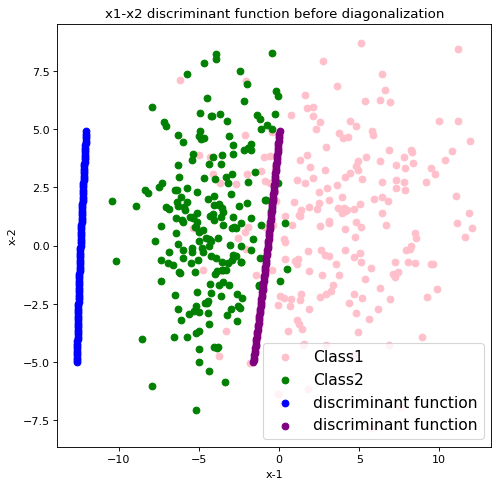

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x1_points_01_w1,
      roots1 = roots1_x0_01_w1,
      roots2 = roots2_x0_01_w1,
      d1 = 1, 
      d2 = 2, 
      title = "discriminant function before diagonalization")

#### Plot on X2-X3 domain

In [ ]:
x2_points_12_w1, roots1_x1_01_w1, roots2_x1_01_w1 = discriminant_function_X1_X2(ML_covariance_1, ML_mean_1, ML_covariance_2, ML_mean_2, p1, p2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


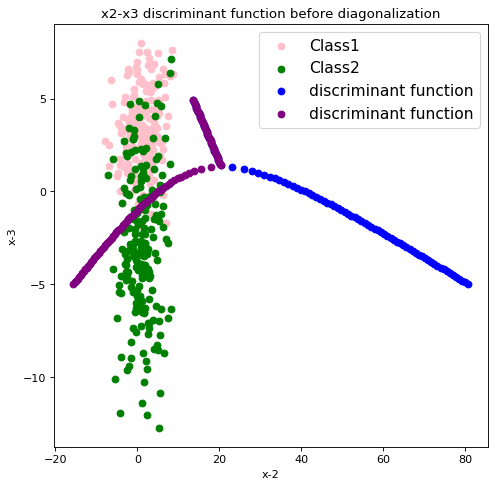

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x2_points_12_w1,
      roots1 = roots1_x1_01_w1,
      roots2 = roots2_x1_01_w1,
      d1 = 2, 
      d2 = 3, 
      title = "discriminant function before diagonalization")

## 3. Parzen

### Class1

In [ ]:
parzen_mean_1, parzen_covariance_1 = parzen_per_dimension(matrix_X1, 0.5)

### Class2

In [ ]:
parzen_mean_2, parzen_covariance_2 = parzen_per_dimension(matrix_X2, 0.5)

In [ ]:
parzen_covariance_1.shape, parzen_mean_1.shape, parzen_covariance_2.shape, parzen_mean_2.shape

((3, 3), (3,), (3, 3), (3,))

### Parzen - Discriminant Function

#### Plot on X1-X2 domain

In [ ]:
x1_points_01_w1, roots1_x0_01_w1, roots2_x0_01_w1 = discriminant_function_X0_X1(parzen_covariance_1, parzen_mean_1, parzen_covariance_2, parzen_mean_2, p1, p2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


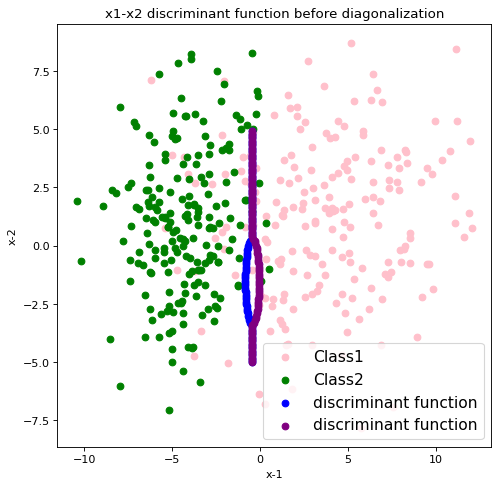

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x1_points_01_w1,
      roots1 = roots1_x0_01_w1,
      roots2 = roots2_x0_01_w1,
      d1 = 1, 
      d2 = 2, 
      title = "discriminant function before diagonalization")

#### Plot on X2-X3 domain

In [ ]:
x2_points_12_w1, roots1_x1_01_w1, roots2_x1_01_w1 = discriminant_function_X1_X2(parzen_covariance_1, parzen_mean_1, parzen_covariance_2, parzen_mean_2, p1, p2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


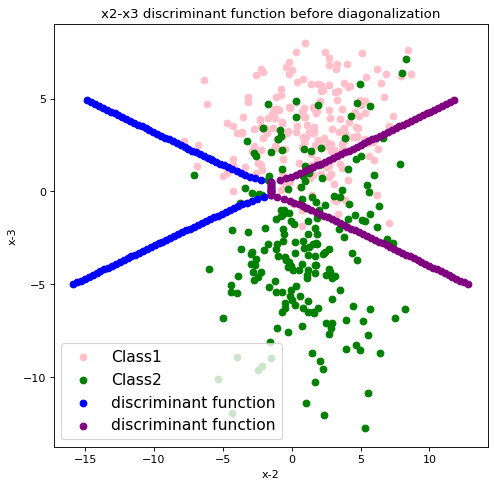

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x2_points_12_w1,
      roots1 = roots1_x1_01_w1,
      roots2 = roots2_x1_01_w1,
      d1 = 2, 
      d2 = 3, 
      title = "discriminant function before diagonalization")

# Part e

Generate 200 new points for each class for testing purposes, classify them and report the 
classification accuracy. 

Do this (i.e., using all 400 points) using a ten-fold cross validation and a leave-one-out method.


## Generating points for tests

In [ ]:
test_matrix_X1 = generate_gaussian_matrix(3, 200, mean1, sigma1)
test_matrix_X2 = generate_gaussian_matrix(3, 200, mean2, sigma2)

## Confusion Matrix

In [2]:
# This function calculates tp, tn, fp, and fn for computing the accuracy

# If X_T * A * X + B_T * X + C > 0:
# X belongs to class w1
# Otherwise, X belongs to class w2

def confusion_matrix (class1_points, class2_points, sigma1, mean1, sigma2, mean2, p1, p2):
  tp, tn, fp, fn = 0, 0, 0, 0
  A, B, C = bayes_discriminant(sigma1, mean1, sigma2, mean2, p1, p2)
  # for class1:
  for pnt in class1_points:
    t = np.dot(np.dot(np.transpose(pnt), A), pnt) + np.dot(np.transpose(B), pnt) + C
    if t > 0:
      tp += 1
    if t < 0:
      fn += 1

  # for class2:
  for pnt in class2_points:
    v = np.dot(np.dot(np.transpose(pnt), A), pnt) + np.dot(np.transpose(B), pnt) + C
    if v < 0:
      tn += 1
    if v > 0:
      fp += 1

  return tp, fn, tn, fp

## cross validation

In [ ]:
# function to seperate train and test data points for evaluation
def seperate (points, start, k):
  test = points[start:start+k]
  train = np.concatenate((points[0:start], points[start+k: len(points)]), axis = 0)
  return test, train

In [ ]:
# given tp, fn, tn, fp, calculates the accuracy of two classes
def accuracy_calculation(metrics):
  tp, fn, tn, fp = metrics[0], metrics[1], metrics[2], metrics[3]
  accuracy_class1 = tp / (tp + fn)
  accuracy_class2 = tn / (tn + fp)
  return np.array([accuracy_class1, accuracy_class2])

In [ ]:
def convert_for_parzen (points):
  number_of_points, dim = points.shape[0], points.shape[1]
  converted_points = []
  for d in range(dim):
    l = []
    for n in range(number_of_points):
      l.append(points[n][d])
    converted_points.append(l)
  return np.array(converted_points)

In [ ]:
def k_fold_cv(k, class1_points, class2_points, p1, p2):
  maximum_likelihood_accuracies = []
  Bayesian_accuracies = []
  parzen_accuracies = []

  for fold in range(0, 200, k):
    class1_test, class1_train = seperate(convert(class1_points), fold, k)
    class2_test, class2_train = seperate(convert(class2_points), fold, k)

    # maximum likelihood
    class1_ml_mean, class1_ml_covariance = maximum_likelihood_mean(class1_train), maximum_likelihood_covariance(class1_train)
    class2_ml_mean, class2_ml_covariance = maximum_likelihood_mean(class2_train), maximum_likelihood_covariance(class2_train)
    maximum_likelihood_accuracies.append(accuracy_calculation(confusion_matrix(class1_test, class2_test, class1_ml_covariance, class1_ml_mean, class2_ml_covariance, class2_ml_mean, p1, p2)))
    
    # Bayesian
    class1_bl_mean, class1_bl_covariance = Bayesian_mean_estimation(class1_train, sigma1, covariance_0, mean_0), maximum_likelihood_covariance(class1_train)
    class2_bl_mean, class2_bl_covariance = Bayesian_mean_estimation(class2_train, sigma2, covariance_0, mean_0), maximum_likelihood_covariance(class2_train)
    Bayesian_accuracies.append(accuracy_calculation(confusion_matrix(class1_test, class2_test, class1_bl_covariance, class1_bl_mean, class2_bl_covariance, class2_bl_mean, p1, p2)))
   
    # Parzen
    class1_train_change = convert_for_parzen(class1_train)
    class2_train_change = convert_for_parzen(class2_train)
    class1_parzen_mean, class1_parzen_covariance = parzen_per_dimension(class1_train_change, 0.5)
    class2_parzen_mean, class2_parzen_covariance = parzen_per_dimension(class2_train_change, 0.5)
    #print(class1_parzen_mean.shape, class1_parzen_covariance.shape, class2_parzen_mean.shape, class2_parzen_covariance.shape)
    parzen_accuracies.append(accuracy_calculation(confusion_matrix(class1_test, class2_test, class1_parzen_covariance, class1_parzen_mean, class2_parzen_covariance, class2_parzen_mean, p1, p2)))

    mean_ml_accuracies = np.mean(maximum_likelihood_accuracies, axis=0)
    mean_bl_accuracies = np.mean(Bayesian_accuracies, axis=0)
    mean_parzen_accuracies = np.mean(parzen_accuracies, axis=0)
    return mean_ml_accuracies, mean_bl_accuracies, mean_parzen_accuracies

### 10-fold cross validation

In [ ]:
ten_fold_accuracy_ml, ten_fold_accuracy_bl, ten_fold_accuracy_parzen = k_fold_cv(10, test_matrix_X1, test_matrix_X2, 0.5, 0.5)

In [ ]:
ten_fold_accuracy_ml, ten_fold_accuracy_bl, ten_fold_accuracy_parzen

(array([0.9, 1. ]), array([0.9, 1. ]), array([0.6, 0.7]))

10-fold CV:

maximum likelihood accuracy:

class1: 90%

class2: 100%



---



Bayesian accuracy:

class1: 90%

class2: 100%



---


Parzen accuracy:

class1: 60%

class2: 70%

### Leave one out

In [ ]:
leave_one_out_accuracy_ml, leave_one_out_accuracy_bl, leave_one_out_accuracy_parzen = k_fold_cv(1, test_matrix_X1, test_matrix_X2, 0.5, 0.5)

In [ ]:
leave_one_out_accuracy_ml, leave_one_out_accuracy_bl, leave_one_out_accuracy_parzen

(array([1., 1.]), array([1., 1.]), array([1., 1.]))

Leave one out:

maximum likelihood accuracy:

class1: 100%

class2: 100%



---



Bayesian accuracy:

class1: 100%

class2: 100%


---



Parzen accuracy:

class1: 100%

class2: 100%

# Part f

Repeat (a)-(d) for the same data after you have diagonalized it

In [ ]:
# Diagonalizing function

def diagonalize (matrix_X1, matrix_X2, sigma1, mean1, sigma2, mean2):

  # Calculate eigen values and eigen vectors of sigma1 and sigma2
  eigen_value_sigma_1, eigen_vector_sigma1 = LA.eig(sigma1)
  eigen_value_sigma_2, eigen_vector_sigma2 = LA.eig(sigma2)

  # Step1: Diagonalizing the distribution of points in class 1 -> isothetic elipses
  # Y = H * X
  matrix_Y1 = np.dot(np.transpose(eigen_vector_sigma1), matrix_X1)
  matrix_Y2 = np.dot(np.transpose(eigen_vector_sigma1), matrix_X2)
  # sigma Y = H * sigma X * transpose(H)
  sigma_Y1 = np.dot(np.dot(np.transpose(eigen_vector_sigma1), sigma1), eigen_vector_sigma1)
  sigma_Y2 = np.dot(np.dot(np.transpose(eigen_vector_sigma1), sigma2), eigen_vector_sigma1)

  # Step2: Diagonalizing and whitening the distribution of points in class 1 -> concentric circles
  # Z = H * Y
  # Z = power(lambda, -1/2) * Y
  matrix_Z1 = np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), matrix_Y1)
  matrix_Z2 = np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), matrix_Y2)
  # sigma Z = H * sigma X * transpose(H)
  # sigma Z = power(lambda, -1/2) * sigma Y * power(lambda, -1/2)
  sigma_Z1 = np.dot(np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), sigma_Y1), np.diag(np.power(eigen_value_sigma_1, -1/2)))
  sigma_Z2 = np.dot(np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), sigma_Y2), np.diag(np.power(eigen_value_sigma_1, -1/2)))

  # Step3: Diagonalizing the distribution of points in class 2 -> isothetic elipses
  eigen_value_sigma_Z1, eigen_vector_sigma_Z1 = LA.eig(sigma_Z1)
  eigen_value_sigma_Z2, eigen_vector_sigma_Z2 = LA.eig(sigma_Z2)
  # A = H * Z
  matrix_A1 = np.dot(np.transpose(eigen_vector_sigma_Z2), matrix_Z1)
  matrix_A2 = np.dot(np.transpose(eigen_vector_sigma_Z2), matrix_Z2)
  # sigma A = H * sigma X * transpose(H)
  sigma_A1 = np.dot( np.dot(np.transpose(eigen_vector_sigma_Z2), sigma_Z1), eigen_vector_sigma_Z2 )
  sigma_A2 = np.dot( np.dot(np.transpose(eigen_vector_sigma_Z2), sigma_Z2), eigen_vector_sigma_Z2 )


  overall_multiplying_matrix = np.dot(np.dot(np.transpose(eigen_vector_sigma_Z2), np.diag(np.power(eigen_value_sigma_1, -1/2))), np.transpose(eigen_vector_sigma1))
  new_matrix_X1 = np.dot(overall_multiplying_matrix, matrix_X1)
  new_matirx_X2 = np.dot(overall_multiplying_matrix, matrix_X2)
  sigma_new_matrix_X1 = sigma_A1
  sigma_new_matrix_X2 = sigma_A2
  mean_new_matrix_X1 = np.dot(overall_multiplying_matrix, mean1)
  mean_new_matrix_X2 = np.dot(overall_multiplying_matrix, mean2)

  return new_matrix_X1, new_matirx_X2, sigma_new_matrix_X1, sigma_new_matrix_X2, mean_new_matrix_X1, mean_new_matrix_X2

 Diagonalize training points

In [ ]:
new_matrix_X1, new_matirx_X2, sigma_new_matrix_X1, sigma_new_matrix_X2, mean_new_matrix_X1, mean_new_matrix_X2 = diagonalize (matrix_X1, matrix_X2, sigma1, mean1, sigma2, mean2)

 Diagonalize testing points

In [ ]:
new_test_matrix_X1, new_test_matrix_X2, sigma_new_test_matrix_X1, sigma_new_test_matrix_X2, mean_new_test_matrix_X1, mean_new_test_matrix_X2 = diagonalize(test_matrix_X1, test_matrix_X2, sigma1, mean1, sigma2, mean2)

## Part b -- after diagonalization

### Maximum Likelihood

In [ ]:
maximum_likelihood_mean(convert(new_matrix_X1))

array([-1.51245189,  0.86453439, -0.32643704])

#### Convergence of Maximum-Likelihood mean estimation

##### Maximum Likelihood Mean Convergence - Class1

In [ ]:
points, ml_mean_conv1 = mean_convergence_ml(convert(new_matrix_X1), mean_new_matrix_X1)

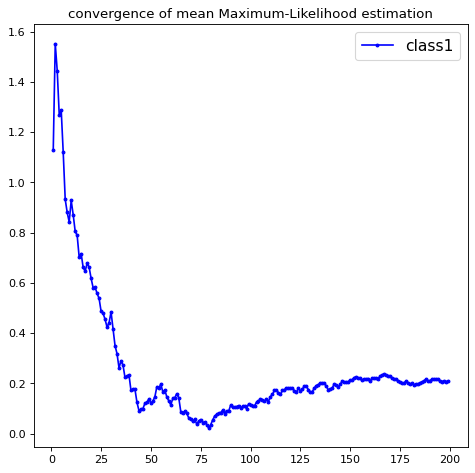

In [ ]:
convergence_plot(points, ml_mean_conv1, "convergence of mean Maximum-Likelihood estimation", "class1")

##### Maximum Likelihood Mean Convergence - Class2

In [ ]:
points, ml_mean_conv2 = mean_convergence_ml(convert(new_matirx_X2), mean_new_matrix_X2)

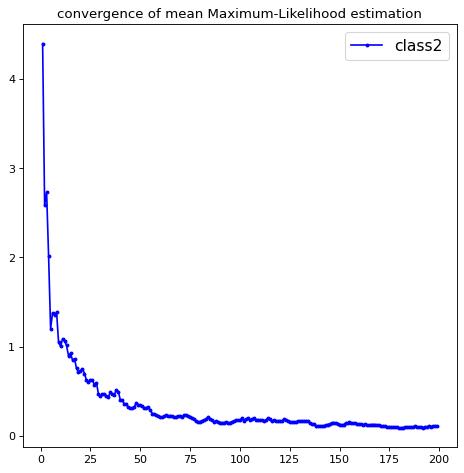

In [ ]:
convergence_plot(points, ml_mean_conv2, "convergence of mean Maximum-Likelihood estimation", "class2")

### Bayesian

##### Bayesian Convergence - Class1

In [ ]:
points1, bl_mean_conv1 = mean_convergence_Bayesian(convert(new_matrix_X1), mean_new_matrix_X1)

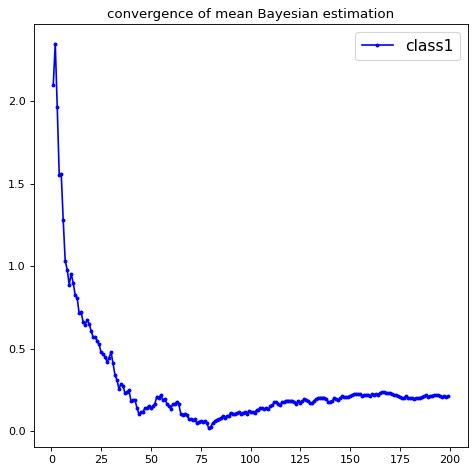

In [ ]:
convergence_plot(points1, bl_mean_conv1, "convergence of mean Bayesian estimation", "class1")

##### Bayesian Convergence - Class2

In [ ]:
points2, bl_mean_conv2 = mean_convergence_Bayesian(convert(new_matirx_X2), mean_new_matrix_X2)

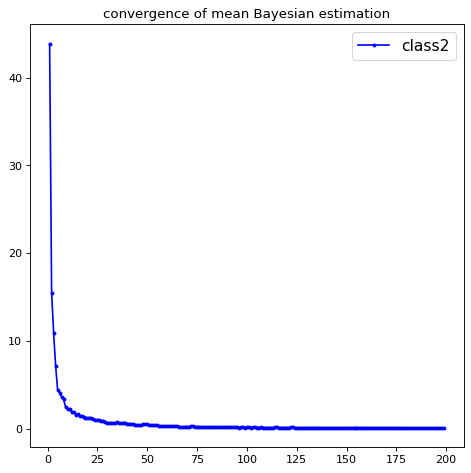

In [ ]:
convergence_plot(points2, bl_mean_conv2, "convergence of mean Bayesian estimation", "class2")

## Part c -- after diagonalization

(array([-0.15032528,  0.07908363, -0.03095366]),
 array([[0.11207195, 0.        , 0.        ],
        [0.        , 0.10082154, 0.        ],
        [0.        , 0.        , 0.11088397]]))

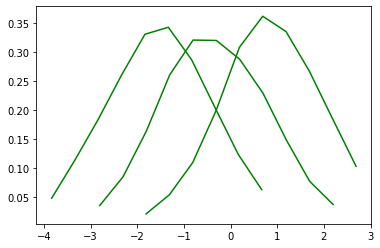

In [ ]:
Parzen_mean_1, Parzen_covariance_1 = parzen_per_dimension(new_matrix_X1, 0.5)
Parzen_mean_1, Parzen_covariance_1

### Class2

(array([ 0.06213815, -0.18180804, -0.03298348]),
 array([[0.19319536, 0.        , 0.        ],
        [0.        , 0.06328496, 0.        ],
        [0.        , 0.        , 0.10867925]]))

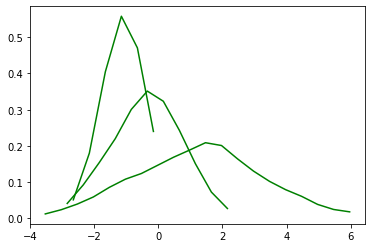

In [ ]:
Parzen_mean_2, Parzen_covariance_2 = parzen_per_dimension(new_matirx_X2, 0.5)
Parzen_mean_2, Parzen_covariance_2

## part d -- after diagonalization

### 1. Maximum Likelihood

#### Class1

In [ ]:
ML_mean_1 = maximum_likelihood_mean(convert(new_matrix_X1))
ML_covariance_1 = maximum_likelihood_covariance(convert(new_matrix_X1))

#### Class2

In [ ]:
ML_mean_2 = maximum_likelihood_mean(convert(new_matirx_X2))
ML_covariance_2 = maximum_likelihood_covariance(convert(new_matirx_X2))

#### Maximum Likelihood - Discriminant Function

##### Plot on X1-X2 domain

In [ ]:
x1_points_01_w1, roots1_x0_01_w1, roots2_x0_01_w1 = discriminant_function_X0_X1(ML_covariance_1, ML_mean_1, ML_covariance_2, ML_mean_2, p1, p2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


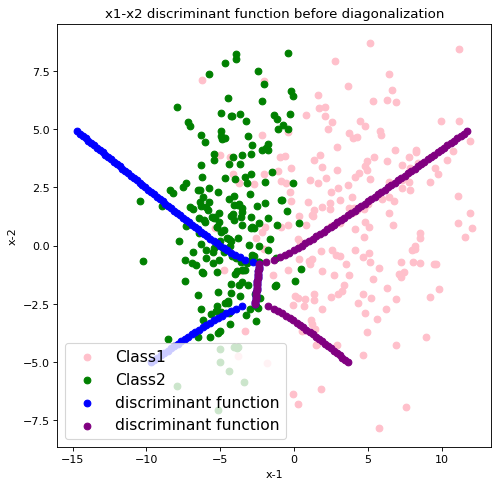

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x1_points_01_w1,
      roots1 = roots1_x0_01_w1,
      roots2 = roots2_x0_01_w1,
      d1 = 1, 
      d2 = 2, 
      title = "discriminant function before diagonalization")

##### Plot on X2-X3 domain

In [ ]:
x2_points_12_w1, roots1_x1_01_w1, roots2_x1_01_w1 = discriminant_function_X1_X2(ML_covariance_1, ML_mean_1, ML_covariance_2, ML_mean_2, p1, p2)

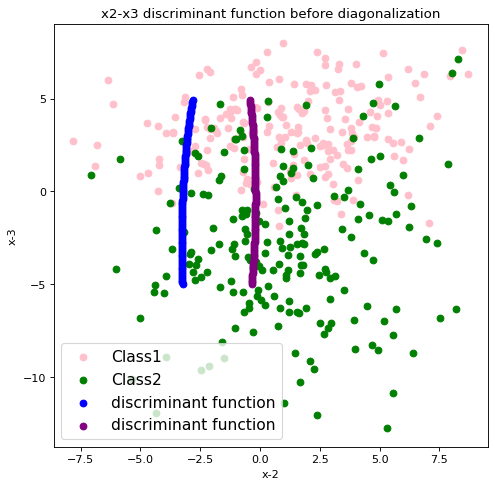

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x2_points_12_w1,
      roots1 = roots1_x1_01_w1,
      roots2 = roots2_x1_01_w1,
      d1 = 2, 
      d2 = 3, 
      title = "discriminant function before diagonalization")

### 2. Bayesian

In [ ]:
covariance_0 = np.identity(3)
mean_0 = np.array([1, 0, 1])

#### Class1

In [ ]:
#data, covariance, covariance_0, mean_0

bl_mean_1 = Bayesian_mean_estimation(convert(new_matrix_X1), ML_covariance_1, covariance_0, mean_0)

#### Class2

In [ ]:
bl_mean_2 = Bayesian_mean_estimation(convert(new_matirx_X2), ML_covariance_2, covariance_0, mean_0)

#### Bayesian - Discriminant Function

##### Plot on X1-X2 domain

In [ ]:
x1_points_01_w1, roots1_x0_01_w1, roots2_x0_01_w1 = discriminant_function_X0_X1(ML_covariance_1, bl_mean_1, ML_covariance_2, bl_mean_2, p1, p2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


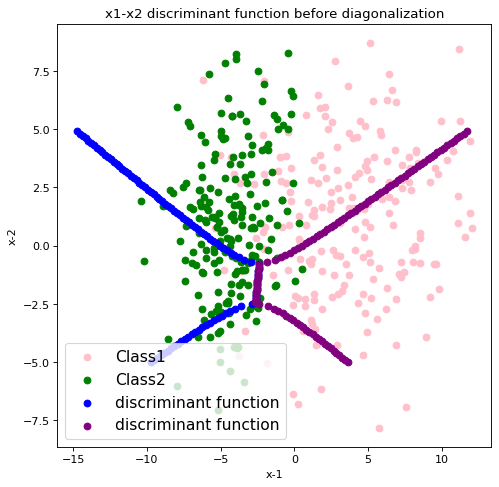

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x1_points_01_w1,
      roots1 = roots1_x0_01_w1,
      roots2 = roots2_x0_01_w1,
      d1 = 1, 
      d2 = 2, 
      title = "discriminant function before diagonalization")

##### Plot on X2-X3 domain

In [ ]:
x2_points_12_w1, roots1_x1_01_w1, roots2_x1_01_w1 = discriminant_function_X1_X2(ML_covariance_1, ML_mean_1, ML_covariance_2, ML_mean_2, p1, p2)

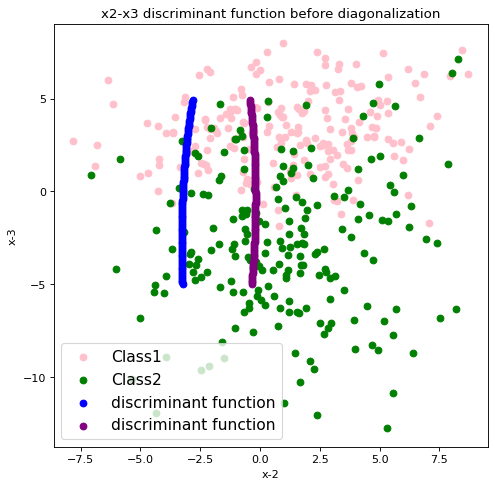

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x2_points_12_w1,
      roots1 = roots1_x1_01_w1,
      roots2 = roots2_x1_01_w1,
      d1 = 2, 
      d2 = 3, 
      title = "discriminant function before diagonalization")

### 3. Parzen

#### Class1

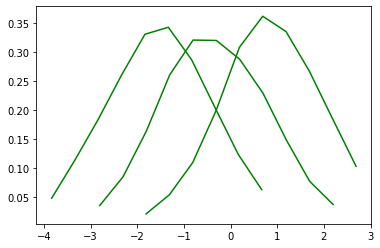

In [ ]:
parzen_mean_1, parzen_covariance_1 = parzen_per_dimension(new_matrix_X1, 0.5)

#### Class2

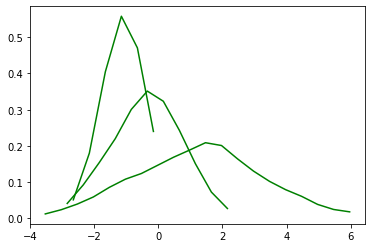

In [ ]:
parzen_mean_2, parzen_covariance_2 = parzen_per_dimension(new_matirx_X2, 0.5)

#### Parzen - Discriminant Function

##### Plot on X1-X2 domain

In [ ]:
x1_points_01_w1, roots1_x0_01_w1, roots2_x0_01_w1 = discriminant_function_X0_X1(parzen_covariance_1, parzen_mean_1, parzen_covariance_2, parzen_mean_2, p1, p2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


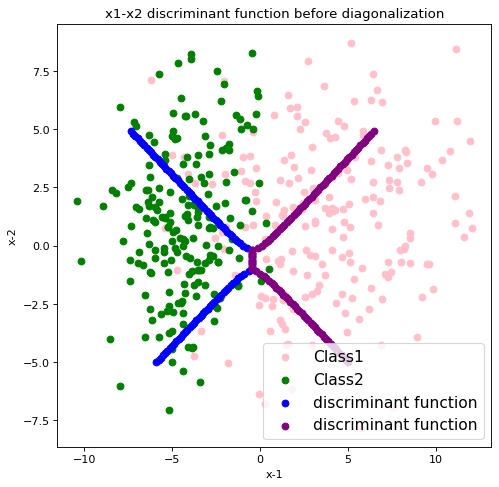

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x1_points_01_w1,
      roots1 = roots1_x0_01_w1,
      roots2 = roots2_x0_01_w1,
      d1 = 1, 
      d2 = 2, 
      title = "discriminant function before diagonalization")

##### Plot on X2-X3 domain

In [ ]:
x2_points_12_w1, roots1_x1_01_w1, roots2_x1_01_w1 = discriminant_function_X1_X2(parzen_covariance_1, parzen_mean_1, parzen_covariance_2, parzen_mean_2, p1, p2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


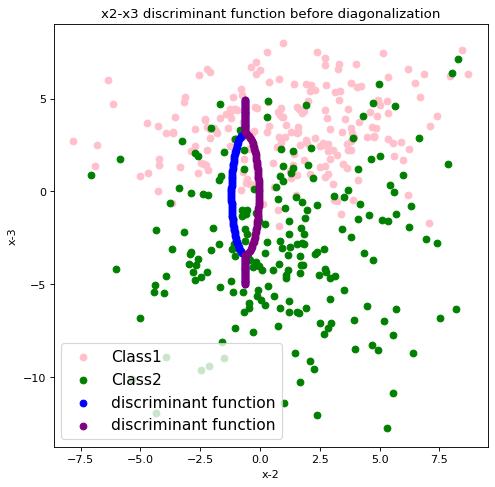

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x2_points_12_w1,
      roots1 = roots1_x1_01_w1,
      roots2 = roots2_x1_01_w1,
      d1 = 2, 
      d2 = 3, 
      title = "discriminant function before diagonalization")

## part e -- after diagonalization

### 10-fold cross validation

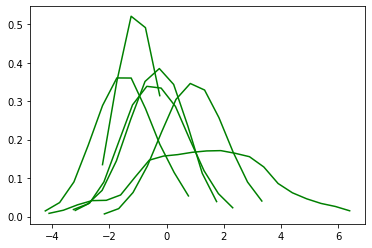

In [ ]:
ten_fold_accuracy_ml, ten_fold_accuracy_bl, ten_fold_accuracy_parzen = k_fold_cv(10, new_test_matrix_X1, new_test_matrix_X2, 0.5, 0.5)

In [ ]:
ten_fold_accuracy_ml, ten_fold_accuracy_bl, ten_fold_accuracy_parzen

(array([0.9, 1. ]), array([0.9, 1. ]), array([0.6, 1. ]))

10-fold CV:

maximum likelihood accuracy:

class1: 90%

class2: 100%



---



Bayesian accuracy:

class1: 90%

class2: 100%



---


Parzen accuracy:

class1: 60%

class2: 100%

### Leave one out

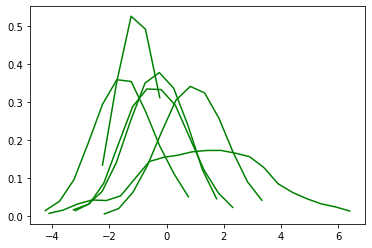

In [ ]:
leave_one_out_accuracy_ml, leave_one_out_accuracy_bl, leave_one_out_accuracy_parzen = k_fold_cv(1, new_test_matrix_X1, new_test_matrix_X2, 0.5, 0.5)

In [ ]:
leave_one_out_accuracy_ml, leave_one_out_accuracy_bl, leave_one_out_accuracy_parzen

(array([1., 1.]), array([1., 1.]), array([1., 1.]))

Leave one out:

maximum likelihood accuracy:

class1: 100%

class2: 100%



---



Bayesian accuracy:

class1: 100%

class2: 100%


---



Parzen accuracy:

class1: 100%

class2: 100%